# EDA for CEFR Levels

In [1]:
import numpy as np
import string
import cloudpickle as pickle
import re
import pandas as pd
import itertools
import bcolz
import os
from keras.utils.np_utils import to_categorical
from keras.utils.data_utils import get_file
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


This path can be adjusted as needed; I just dumped the 'sentences' folder from the unzipped file from Giuseppe and put it in the /data directory.

In [2]:
data_path = 'data/sentences/'

In [3]:
%matplotlib inline

In [4]:
cefr_levels = ['a1','a2','b1','b2']

## Sort data into train, valid, and test sets

In [5]:
%pwd

'/Users/Anatoly/GitHub/ML-Co-learning-team/CEFR'

### Load and process data

In [6]:
import spacy
nlp = spacy.load('en')



In [7]:
base_file = ' sentences.txt'

docs = [];
for level in cefr_levels:
    text = open(data_path + level + base_file).read()
    docs.append(nlp(text))



In [23]:
X = []
y = []
colors = ['red','green','blue','purple']


# sent.vector returns average vector of all tokens, not a good metric, but should work for first try

for i,doc in enumerate(docs):
    for s in doc.sents:
        X.append(s.vector)
        y.append(colors[i])

In [21]:
from sklearn.manifold import TSNE
import numpy as np

ishuffle = np.random.permutation(len(X))
Xn = np.array(X)
yn = np.array(y)

# select a smaller subset for testing
Xshort = Xn[(ishuffle[:], Ellipsis)]
yshort = yn[(ishuffle[:], Ellipsis)]

# a bit slow with full dataset, may need to reduce column count with PCA
model = TSNE(n_components=2, random_state=42)
np.set_printoptions(suppress=True)

mapped = model.fit_transform(  Xshort ) 

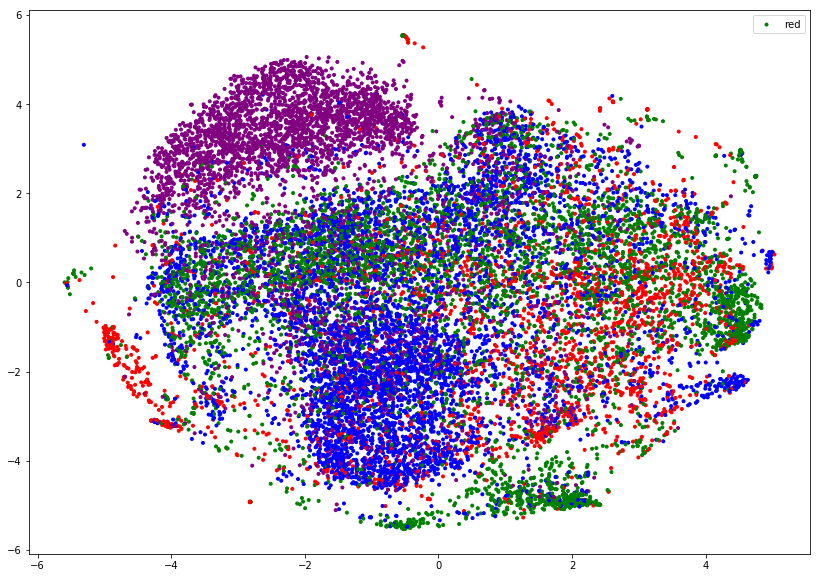

In [29]:
# if want to make faster, use raster backend
#import matplotlib
#matplotlib.use('Agg')



import matplotlib.pyplot as plt


plt.figure(figsize=(14,10))
plt.scatter(mapped[:,0],mapped[:,1],c=yshort, marker='.')

# legend still doesn't work, need to work on
plt.legend(colors)

